(examples:cbed_quickstart)=
# CBED quickstart

In [73]:
import matplotlib.pyplot as plt
import numpy as np

from ase.build import bulk
from dask.distributed import Client

import abtem

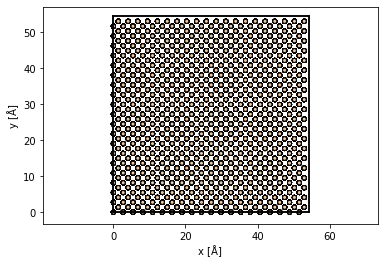

In [72]:
silicon = bulk('Si', crystalstructure='diamond', cubic=True)
silicon *= (10,10,100)

abtem.show_atoms(silicon);

In [67]:
frozen_phonons = abtem.FrozenPhonons(silicon, 2, {'Si':.0})

potential = abtem.Potential(frozen_phonons, 
                            gpts = 512,
                            projection = 'infinite', 
                            slice_thickness = 0.5,
                            exit_planes = 10,
                            )

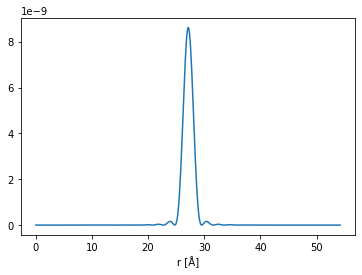

In [71]:
wave = abtem.Probe(energy=100e3, semiangle_cutoff=9.4)
wave.grid.match(potential)

wave.profile().show();

In [51]:
measurement = wave.multislice(potential).diffraction_patterns(max_angle=30).mean(0)

In [52]:
measurement.compute()

[########################################] | 100% Completed | 22.6s
CPU times: total: 4min 46s
Wall time: 22.6 s


In [54]:
measurement.array.shape

(110, 92, 92)

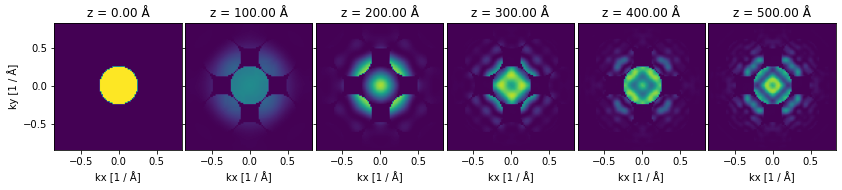

In [61]:
fig, ax = measurement[::20].show(explode=True, 
                                 common_color_scale=True, 
                                 figsize=(14, 4),
                                 image_grid_kwargs = {'axes_pad': .05},
                                )

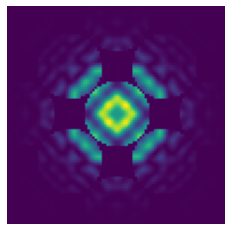

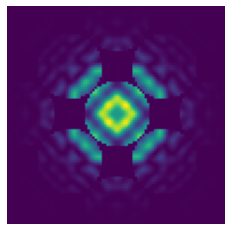

In [76]:
from myst_nb import glue

fig, ax = measurement[-1].show(figsize=(4,4))
ax.axis('off')

glue("cbed_quickstart", ax.get_figure(), display=False)